# Convert Berkeley Earth Anomalies to GAST + cnv

In [1]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Load temperature anomalies file

In [2]:
fname_in = '../data/GASTa_BerkeleyEarth_1850-2023.txt'

In [3]:
names = ['Year', 'Month', 'Monthly Anomaly', 'Monthly Anomaly Uncertainty', 
         'Annual Anomaly', 'Annual Anomaly Uncertainty',
         'Five-Year Anomaly', 'Five-Year Anomaly Uncertainty',
         'Ten-Year Anomaly', 'Ten-Year Anomaly Uncertainty',
         'Twenty-Year Anomaly', 'Twenty-Year Anomaly Uncertainty']

In [4]:
widths = [6, 6, 11, 6, 11, 7, 11, 6, 11, 6, 11, 6]

In [5]:
df = pd.read_fwf(fname_in, skiprows=85, widths=widths, header=None, names=names)

## Add global mean temp to anomalies
As Earth's land is not distributed symmetrically about the equator, there exists a mean seasonality to the global average temperature.

Using air temperature above sea ice:
 
<u>Estimated Jan 1951-Dec 1980 monthly absolute temperature:</u>

      Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov   Dec

     12.23 12.44 13.06 13.97 14.94 15.66 15.95 15.78 15.19 14.25 13.23 12.49
      0.03  0.04  0.04  0.03  0.03  0.03  0.03  0.03  0.04  0.03  0.04  0.04 (+/-) 

In [6]:
c = {
    'Month' : np.arange(1,13),
    'Monthly Average' : [12.23, 12.44, 13.06, 13.97, 14.94, 15.66, 15.95, 15.78, 15.19, 14.25, 13.23, 12.49]
}

In [7]:
climM = pd.DataFrame(data=c)

In [8]:
df['Monthly Average'] = df.groupby('Month')['Monthly Anomaly'].transform(lambda x: x + climM.loc[climM['Month'] == x.name]['Monthly Average'].values[0])

In [9]:
df

,Year,Month,Monthly Anomaly,Monthly Anomaly Uncertainty,Annual Anomaly,Annual Anomaly Uncertainty,Five-Year Anomaly,Five-Year Anomaly Uncertainty,Ten-Year Anomaly,Ten-Year Anomaly Uncertainty,Twenty-Year Anomaly,Twenty-Year Anomaly Uncertainty,Monthly Average
0,1850,1,-0.790,0.404,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.440
1,1850,2,-0.243,0.524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.197
2,1850,3,-0.394,0.449,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.666
3,1850,4,-0.625,0.304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.345
4,1850,5,-0.652,0.249,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.288
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2083,2023,8,1.312,0.047,1.298,0.029,NaN,NaN,NaN,NaN,NaN,NaN,17.092
2084,2023,9,1.546,0.040,1.304,0.036,NaN,NaN,NaN,NaN,NaN,NaN,16.736
2085,2023,10,1.394,0.046,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.644
2086,2023,11,1.412,0.050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.642


<Axes: >

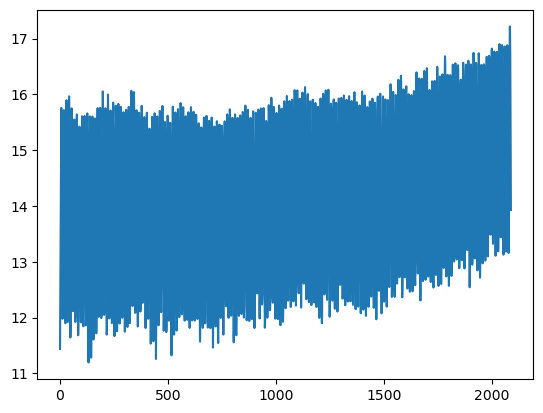

In [10]:
df['Monthly Average'].plot()

<Axes: xlabel='Month'>

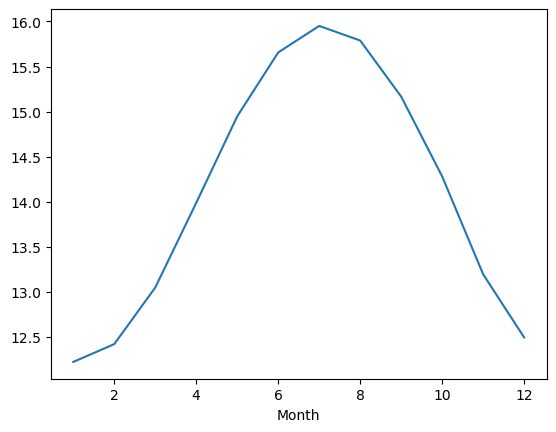

In [11]:
df['Monthly Average'].groupby(df['Month']).mean().plot()

## Write Monthly Averages to .csv

In [12]:
df_out = df[['Year','Month','Monthly Average','Monthly Anomaly Uncertainty']].copy()

In [13]:
df_out

,Year,Month,Monthly Average,Monthly Anomaly Uncertainty
0,1850,1,11.440,0.404
1,1850,2,12.197,0.524
2,1850,3,12.666,0.449
3,1850,4,13.345,0.304
4,1850,5,14.288,0.249
...,...,...,...,...
2083,2023,8,17.092,0.047
2084,2023,9,16.736,0.040
2085,2023,10,15.644,0.046
2086,2023,11,14.642,0.050


In [14]:
fname_out = '../data/GAST_BerkeleyEarth_1850-2023.csv'

In [16]:
# save output as csv
df_out.to_csv(fname_out, index=False)